**Prerequisites**: 
    - numpy
    - straph
    - matplotlib
    - seaborn
    - networkx

In [1]:
import sys,os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from straph import stream_graph as sg
plt.rcParams["figure.figsize"] = (12,8)

# Straph Tutorial

## 1. Introduction

A stream graph $S = (T,V,W,E)$ is defined by a set of time instants $T$, a finite set of nodes $V$, a set of temporal nodes $W \subseteq T \times V$, and a set of links $E\subseteq T \times V \times V$.
The set of time instants $T$ can be continuous or discrete. Likewise interactions (temporal links) between two nodes can be discrete $(b,b,u,v)$ or continuous $(b,e,u,v)$.

Stream graph can be used to model (blabal examples + cf Use Case) (TODO)

**Paradigme**: Simple data structures should be represented by built-in python objects, resulting in a more comprehensive, intuitive and efficient code.

First of all, we load an artificial example that will be used in the following steps of analysis and visualisation.

In [3]:
path_directory = os.getcwd()+"/../examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "example_nodes.sg",
                         path_links=path_directory + "example_links.sg")

### 1.1 Stream Graph Object

A stream graph object is constituted by five principal attributes:
- ```times```: the time window of the stream graph ($T$)
- ```nodes```: the list of nodes present in the stream graph ($V$)
- ```node_presence```: a list of list, each list is associated to a node and contains its presence time ($W$)
- ```links```: the list of links present in the stream graph ($E$)
- ```node_presence```: a list of list, each list is associated to a link and contains its presence time ($E$)

In [4]:
S.times

[0.0, 10.0]

The stream graph ```S``` spans from $0$ to $10$.

In [5]:
S.nodes

[0, 1, 2, 3, 4, 5]

```S``` contains $6$ nodes.
Nodes are always represented by integers, their labels can be stored in the attribute ```node_to_label```.

In [6]:
S.node_to_label

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F'}

In [7]:
S.node_presence

[[0.0, 5.0, 7.0, 10.0],
 [0.0, 10.0],
 [0.0, 1.0, 6.0, 10.0],
 [0.0, 1.0, 2.0, 3.0, 8.0, 10.0],
 [0.0, 10.0],
 [0.0, 3.0, 7.0, 10.0]]

The fist node $A$ is present from time $0$ to $5$ and again from $7$ to $10$ (cf: the following figure).

Links follow the same structure:

In [8]:
S.links

[(0, 1), (1, 2), (1, 4), (2, 4), (3, 2), (3, 4), (4, 5)]

In [9]:
S.link_presence

[[0.0, 4.0, 7.0, 8.0],
 [6.0, 8.0],
 [4.0, 4.0],
 [7.0, 7.0],
 [0.0, 1.0],
 [2.0, 3.0, 9.0, 10.0],
 [0.0, 3.0, 7.0, 10.0]]

The link $(E,F)$=$(4,5)$ is present from $0$ to $3$ and from $7$ to $10$ (cf: the following figure)

### 1.2 Basic visualisation

We refer to this [Notebook](2.1 Drawing.ipynb) for more details on visualisation.

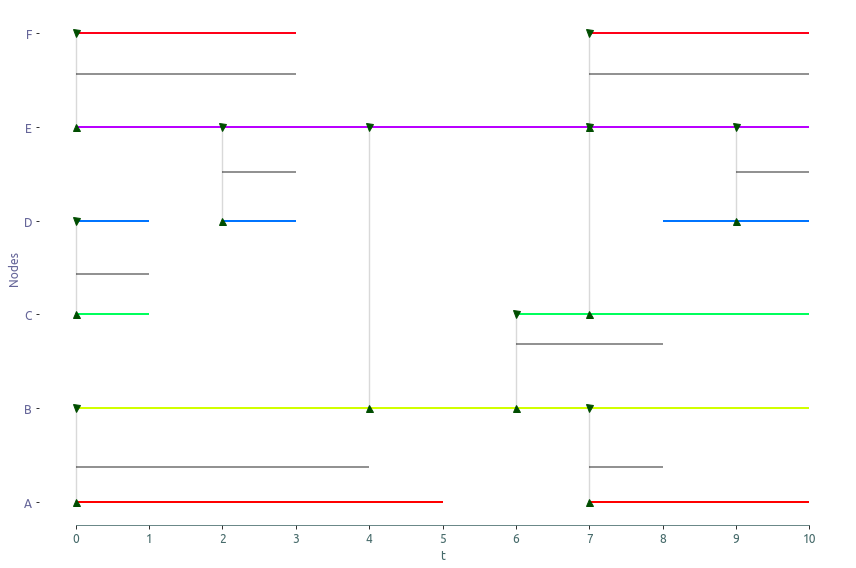

In [10]:
S.plot()
plt.show()

### 1.3 Manipulating a Stream Graph

There are several manners to manipulate a Stream Graph:
   - Iterating on each node 
   - Iterating on each link
   - Iterating on temporally ordered links
   - Iterating on temporally ordered events

In [11]:
for n,np in zip(S.nodes,S.node_presence):
    for b,e in zip(np[::2],np[1::2]):
        print("Node ",S.node_to_label[n]," is present from ",b," to ",e)

Node  A  is present from  0.0  to  5.0
Node  A  is present from  7.0  to  10.0
Node  B  is present from  0.0  to  10.0
Node  C  is present from  0.0  to  1.0
Node  C  is present from  6.0  to  10.0
Node  D  is present from  0.0  to  1.0
Node  D  is present from  2.0  to  3.0
Node  D  is present from  8.0  to  10.0
Node  E  is present from  0.0  to  10.0
Node  F  is present from  0.0  to  3.0
Node  F  is present from  7.0  to  10.0


In [12]:
for l,lp in zip(S.links,S.link_presence):
    for b,e in zip(lp[::2],lp[1::2]):
        u,v = l
        print("Link ",(S.node_to_label[u],S.node_to_label[v])," is present from ",b," to ",e)

Link  ('A', 'B')  is present from  0.0  to  4.0
Link  ('A', 'B')  is present from  7.0  to  8.0
Link  ('B', 'C')  is present from  6.0  to  8.0
Link  ('B', 'E')  is present from  4.0  to  4.0
Link  ('C', 'E')  is present from  7.0  to  7.0
Link  ('D', 'C')  is present from  0.0  to  1.0
Link  ('D', 'E')  is present from  2.0  to  3.0
Link  ('D', 'E')  is present from  9.0  to  10.0
Link  ('E', 'F')  is present from  0.0  to  3.0
Link  ('E', 'F')  is present from  7.0  to  10.0


In [13]:
for l in S.ordered_links():
    if l[0] == 1:
        print("Link arrival :",l)
    if l[0] == -1:
        print("Link departure :",l)

Link arrival : (1, 0.0, 4.0, 0, 1)
Link arrival : (1, 0.0, 1.0, 3, 2)
Link arrival : (1, 0.0, 3.0, 4, 5)
Link departure : (-1, 1.0, 3, 2)
Link arrival : (1, 2.0, 3.0, 3, 4)
Link departure : (-1, 3.0, 3, 4)
Link departure : (-1, 3.0, 4, 5)
Link arrival : (1, 4.0, 4.0, 1, 4)
Link departure : (-1, 4.0, 0, 1)
Link departure : (-1, 4.0, 1, 4)
Link arrival : (1, 6.0, 8.0, 1, 2)
Link arrival : (1, 7.0, 8.0, 0, 1)
Link arrival : (1, 7.0, 7.0, 2, 4)
Link arrival : (1, 7.0, 10.0, 4, 5)
Link departure : (-1, 7.0, 2, 4)
Link departure : (-1, 8.0, 0, 1)
Link departure : (-1, 8.0, 1, 2)
Link arrival : (1, 9.0, 10.0, 3, 4)
Link departure : (-1, 10.0, 3, 4)
Link departure : (-1, 10.0, 4, 5)


In [14]:
for e in S.ordered_events():
    if e[0] == 1:
        print("Link arrival :",e)
    if e[0] == -1:
        print("Link departure :",e)
    if e[0] == 2:
        print("Node arrival :",e)
    if e[0] == -2:
        print("Node departure :",e)

Node arrival : (2, 0.0, 5.0, 0)
Node arrival : (2, 0.0, 10.0, 1)
Node arrival : (2, 0.0, 1.0, 2)
Node arrival : (2, 0.0, 1.0, 3)
Node arrival : (2, 0.0, 10.0, 4)
Node arrival : (2, 0.0, 3.0, 5)
Link arrival : (1, 0.0, 4.0, 0, 1, 1, 0)
Link arrival : (1, 0.0, 1.0, 3, 2, 1, 0)
Link arrival : (1, 0.0, 3.0, 4, 5, 1, 0)
Link departure : (-1, 1.0, 3, 2, 1, 0)
Node departure : (-2, 1.0, 2)
Node departure : (-2, 1.0, 3)
Node arrival : (2, 2.0, 3.0, 3)
Link arrival : (1, 2.0, 3.0, 3, 4, 1, 0)
Link departure : (-1, 3.0, 3, 4, 1, 0)
Link departure : (-1, 3.0, 4, 5, 1, 0)
Node departure : (-2, 3.0, 3)
Node departure : (-2, 3.0, 5)
Link arrival : (1, 4.0, 4.0, 1, 4, 1, 0)
Link departure : (-1, 4.0, 0, 1, 1, 0)
Link departure : (-1, 4.0, 1, 4, 1, 0)
Node departure : (-2, 5.0, 0)
Node arrival : (2, 6.0, 10.0, 2)
Link arrival : (1, 6.0, 8.0, 1, 2, 1, 0)
Node arrival : (2, 7.0, 10.0, 0)
Node arrival : (2, 7.0, 10.0, 5)
Link arrival : (1, 7.0, 8.0, 0, 1, 1, 0)
Link arrival : (1, 7.0, 7.0, 2, 4, 1, 0)
Li

## 2. Properties

Most of the concepts described in the formalism : [*Stream Graphs and Link Streams for the Modeling of Interactions over Time*](https://arxiv.org/abs/1710.04073) are implemented in Straph. However some concepts also refer to graph theory to avoid any confusion... (TODO) 

### Number of Nodes and Links

The *number of nodes* is defined by $\Large \frac{|W|}{|T|}$.

In [15]:
nb_nodes = S.nb_nodes()
nb_nodes

4.3

If one wants the number of elements in $V$:

In [16]:
len(S.nodes)

6

The *number of links* is defined by $\Large \frac{|E|}{|T|}$

In [17]:
nb_links = S.nb_links()
nb_links

1.6

If one want the number of distincts links in $E$ (number of elements in $E_{V\times V}$).

In [18]:
len(S.links)

7

### Nodes and Links duration

The *node duration* is defined by $\Large \frac{|W|}{|V|}$.

In [19]:
node_duration = S.node_duration()
node_duration

7.166666666666667

The *link duration* is defined by $\Large \frac{|E|}{|V \times V|}$.

In [20]:
link_duration = S.link_duration()
link_duration

1.0666666666666667

### Uniformity and Coverage

The *uniformity* is defined by 
$$ \frac{\sum_{uv\in V \times V}|T_u \cap T_v|}{\sum_{uv\in V \times V}|T_u \cup T_v|}$$

In [21]:
unif = S.uniformity()
unif

0.2515527950310559

The *coverage* is defined by $\Large \frac{|W|}{|T \times V|}$.

In [22]:
cov = S.coverage()
cov

0.7166666666666667

### Nodes and Links weights

Node and link weights capture information on nodes and links density over time:

Node weight at instant 3 : 0.8333333333333334
Link weight at instant 3 : 0.2


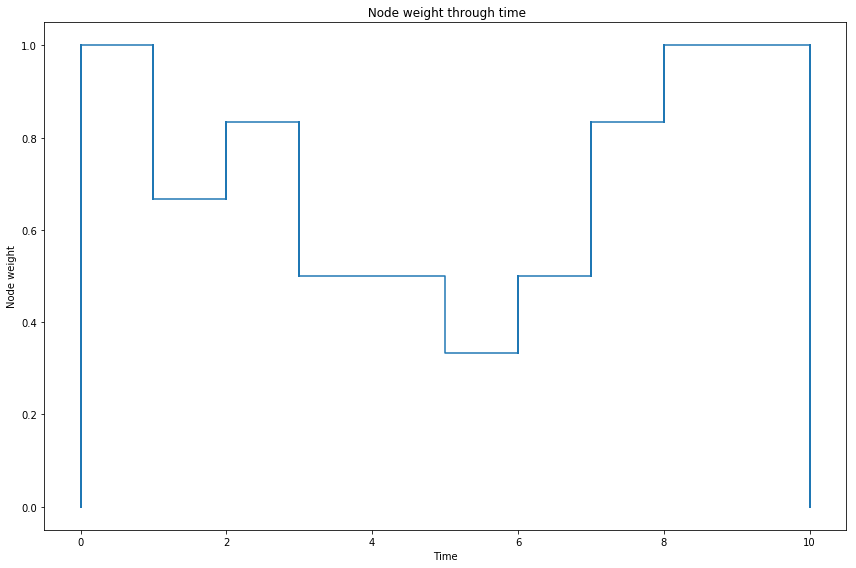

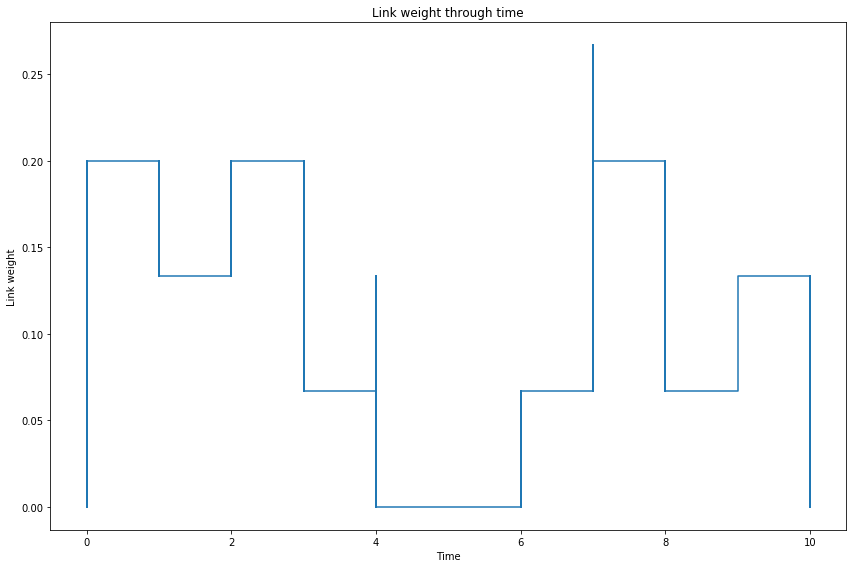

In [30]:
print("Node weight at instant 3 :", S.node_weight_at_t(3))
print("Link weight at instant 3 :", S.link_weight_at_t(3))
S.plot_node_weight()
S.plot_link_weight()

### Node and Link Densities

A node *density* is defined by $$\delta(v) = \frac{\sum_{u\in V, u\neq v}|T_{uv}|}{\sum_{u\in V, u \neq v}|T_u \cap T_v|} $$

In [33]:
node_density = S.node_densities()
node_density

Counter({0: 0.16666666666666666,
         1: 0.21212121212121213,
         2: 0.14285714285714285,
         3: 0.15789473684210525,
         4: 0.24242424242424243,
         5: 0.23076923076923078})

A link *density* is defined by $$\delta(uv) = \frac{|T_{uv}|}{|T_u \cap T_v|}$$

In [32]:
link_density = S.link_densities()
link_density

Counter({(0, 1): 0.625,
         (1, 2): 0.4,
         (1, 4): 0.0,
         (2, 4): 0.0,
         (3, 2): 0.3333333333333333,
         (3, 4): 0.5,
         (4, 5): 1.0})

### Neighbors and Neighborhood

The *neighborhood* is defined by 

In [35]:
Ngh = S.neighborhood()
Ngh

{0: {1: [0.0, 4.0, 7.0, 8.0]},
 1: {0: [0.0, 4.0, 7.0, 8.0], 2: [6.0, 8.0], 4: [4.0, 4.0]},
 2: {1: [6.0, 8.0], 4: [7.0, 7.0], 3: [0.0, 1.0]},
 3: {2: [0.0, 1.0], 4: [2.0, 3.0, 9.0, 10.0]},
 4: {1: [4.0, 4.0],
  2: [7.0, 7.0],
  3: [2.0, 3.0, 9.0, 10.0],
  5: [0.0, 3.0, 7.0, 10.0]},
 5: {4: [0.0, 3.0, 7.0, 10.0]}}

In [36]:
nb_neighbors = S.nb_neighbors()
nb_neighbors

Counter({0: 1, 1: 3, 2: 3, 4: 4, 3: 2, 5: 1})

### Degrees and Expected Degrees

In [27]:
nodes_degree = S.degrees()
nodes_degree

Counter({0: 0.5,
         1: 0.7,
         2: 0.30000000000000004,
         4: 0.8,
         3: 0.30000000000000004,
         5: 0.6})

In [28]:
nodes_expected_degree = S.expected_node_degrees(d = nodes_degrees)
nodes_expected_degree

NameError: name 'nodes_degrees' is not defined

In [ ]:
d_bar = S.average_degree(d=nodes_degrees)
print("Average degree :\t", d_bar)
print("Degree of S :", S.stream_graph_degree())
print("Expected degree of S :", S.expected_stream_graph_degree())

### Clustering Coefficient

In [ ]:
cc = S.clustering_coefficient()
print("Clustering coefficient :\t", cc)
cc_bar = S.average_clustering(cc=cc)
print("Average clustering : \t", cc_bar)

## Components

### Degrees

In [ ]:
degrees = S.degrees_partition()
S.plot_dict_clusters(dict_clusters=degrees,title="Degree")

### Weakly Connected Components (WCC)

In [ ]:
wcc = S.weakly_connected_components()
S.plot(clusters=wcc,title="Weakly Connected Components")

### Strongly Connected Components (SCC)

G is the condensation graph of the Stream Graph S. Each node of G corresponds to a SCC of S.

We can plot the SCC in the same way as WCC.

In [ ]:
scc = S.strongly_connected_components()
S.plot(clusters=scc,title="Strongly Connected Components")

### Condensation

In [ ]:
G = S.condensation_dag() 
G.plot()

### K-cores

In [ ]:
S.k_cores # Add other functions

### K-cliques

In [ ]:
S.k_cliques # add otehr functions

For temporal paths we refer to the specific notebook stream_graphs_paths.ipynb